# WEEK 03
# Encounter 05 - Aggregation and Groupby
# Project Challenge - BONUS

## Task Description

 Using the gapminder_total dataset solve the following tasks with pandas one-liners:
    
 BONUS

 8. What is the highest population a continent ever had?
    **Hint:** group by multiple columns

 9. Which continent had that population and in which year?
    **Hint:** group by multiple columns and filter for the result from `#6`

 10. Plot a bar plot comparison of life_expectancy, fertility, population average per continent
     **Hint:** for a quick and dirty graph use Pandas ploting ability
     **Hint:** use `log=True` to make the visual more friendly to the eyes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data
df = pd.read_csv('../data/gapminder_total.csv')

# converting 'year' and 'population' datatype to 'Int64'
df['year'] = df['year'].astype('Int64')
df['population'] = df['population'].astype('Int64')

df

,country,year,life expectancy,continent,population,fertility
0,Afghanistan,1950,26.85,Asia,7752118,7.67
1,Afghanistan,1951,27.13,Asia,7839426,7.67
2,Afghanistan,1952,27.67,Asia,7934798,7.67
3,Afghanistan,1953,28.19,Asia,8038312,7.67
4,Afghanistan,1954,28.73,Asia,8150037,7.67
...,...,...,...,...,...,...
16970,Turks and Caicos Islands,2015,NaN,NaN,34339,NaN
16971,Tuvalu,2015,NaN,NaN,9916,NaN
16972,Wallis et Futuna,2015,NaN,NaN,13151,NaN
16973,Curaçao,2015,NaN,NaN,157203,NaN


In [3]:
# 8. What is the highest population a continent ever had?
# Hint: group by multiple columns

# grouping data by ('year','continent') and getting continent_population per year
df_continents = df.groupby(['year','continent'])[['population']].agg('sum')
df_continents

population
year continent                        
1950 Africa                  208713758
     Asia                   1353699410
     Australia and Oceania    12382390
     Europe                  449606823
     North America           223546368
...                                ...
2016 Asia                            0
     Australia and Oceania           0
     Europe                          0
     North America                   0
     South America                   0

[402 rows x 1 columns]

In [4]:
df_continents[['population']].max()

population    4271610225
dtype: int64

In [5]:
# getting back index as columns

# df_continents.reset_index(inplace=True)
# df_continents

In [6]:
# 9. Which continent had that population and in which year?
# Hint: group by multiple columns and filter for the result from #6

df_continents['population'].idxmax()

(2015, 'Asia')

In [7]:
# 10. Plot a bar plot comparison of life_expectancy, fertility, population average per continent
# Hint: for a quick and dirty graph use Pandas ploting ability
# Hint: use log=True to make the visual more friendly to the eyes

df_to_plot = df.groupby(['continent']).agg('mean')
df_to_plot

C:\Users\anast\AppData\Local\Temp\ipykernel_26612\2426503131.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_to_plot = df.groupby(['continent']).agg('mean')


,year,life expectancy,population,fertility
continent,,,,
Africa,1983.0,52.376773,10460380.362121,5.931345
Asia,1983.0,62.411267,69909487.432401,4.673862
Australia and Oceania,1983.857143,62.257492,2546718.937097,4.682172
Europe,1983.199483,72.485936,13664236.609152,2.169754
North America,1983.415385,67.078769,20100860.015625,4.002329
South America,1983.0,66.211604,21686601.473485,4.077235


<AxesSubplot: xlabel='continent'>

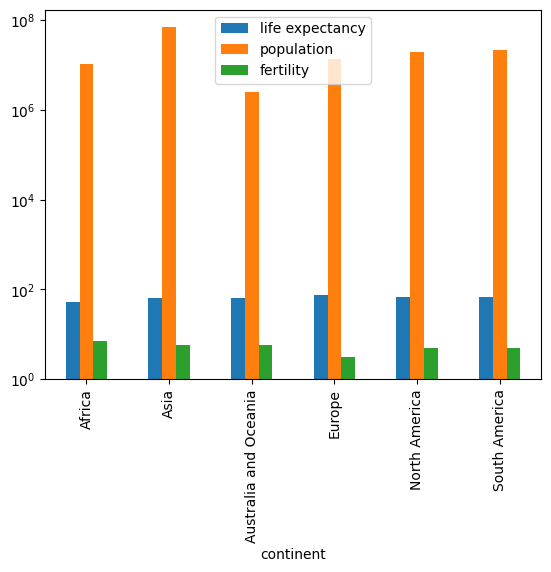

In [8]:
# plotting with Pandas V1

df_to_plot.plot(y=['life expectancy', 'population', 'fertility'], kind='bar', log=True)	

In [9]:
# life expectancy 	population 	fertility

#reset index
df_to_plot.reset_index(inplace=True)
df_to_plot

,continent,year,life expectancy,population,fertility
0,Africa,1983.0,52.376773,10460380.362121,5.931345
1,Asia,1983.0,62.411267,69909487.432401,4.673862
2,Australia and Oceania,1983.857143,62.257492,2546718.937097,4.682172
3,Europe,1983.199483,72.485936,13664236.609152,2.169754
4,North America,1983.415385,67.078769,20100860.015625,4.002329
5,South America,1983.0,66.211604,21686601.473485,4.077235


array([<AxesSubplot: title={'center': 'life expectancy'}, xlabel='continent'>,
       <AxesSubplot: title={'center': 'population'}, xlabel='continent'>,
       <AxesSubplot: title={'center': 'fertility'}, xlabel='continent'>],
      dtype=object)

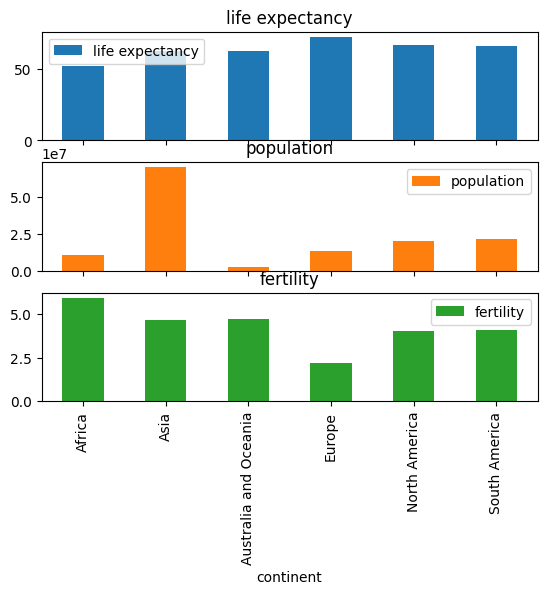

In [10]:
df_to_plot.plot(x='continent', y=['life expectancy', 'population', 'fertility'], subplots=True, kind='bar')	

Text(0, 0.5, 'Average values')

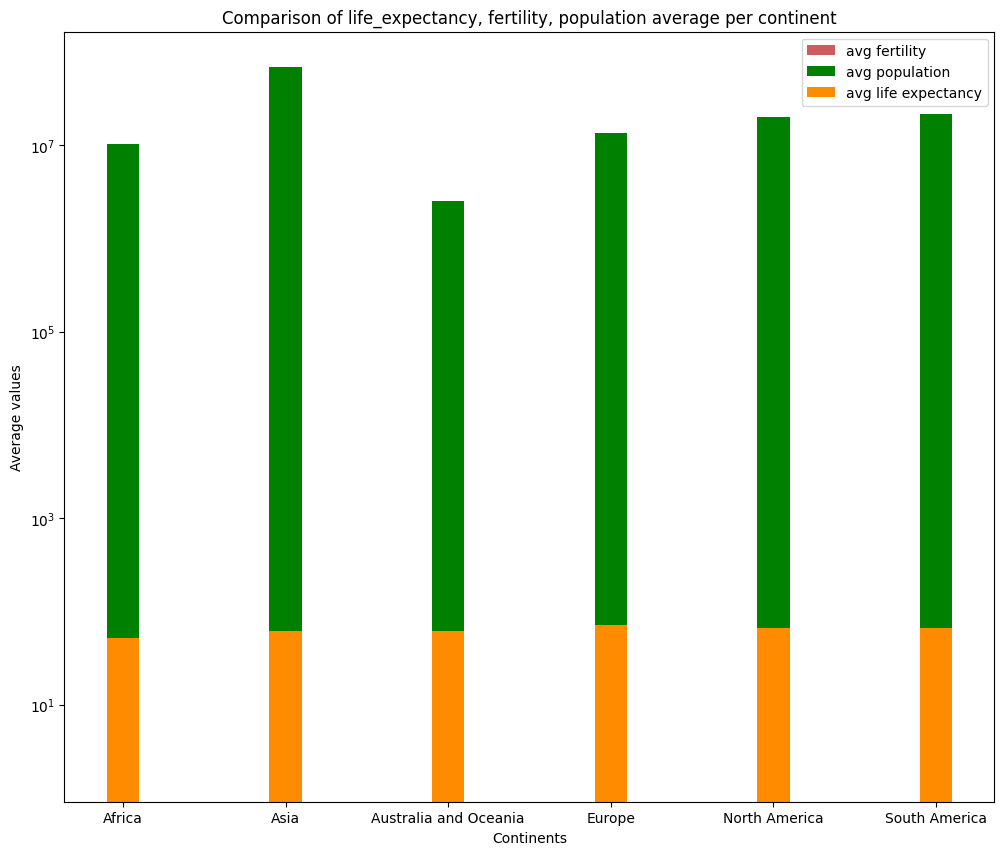

In [11]:
x_vals = df_to_plot['continent']
y_vals_fert = df_to_plot['fertility']
y_vals_pop = df_to_plot['population']
y_vals_lefe_exp = df_to_plot['life expectancy']

# plotting starts
#plt.style.use('ggplot')
plt.figure(figsize=(12, 10))

plt.bar(x_vals, y_vals_fert, label='avg fertility', color='indianred', width=0.2, log=True)
plt.bar(x_vals, y_vals_pop, label='avg population', color='green', width=0.2, log=True)
plt.bar(x_vals, y_vals_lefe_exp, label='avg life expectancy', color='darkorange', width=0.2, log=True)

# title
plt.title('Comparison of life_expectancy, fertility, population average per continent')
plt.legend()

# label names
plt.xlabel('Continents')
plt.ylabel('Average values')